In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os   # handling the files
import pickle # storing numpy features
import numpy as np
from tqdm.notebook import tqdm # how much data is process till now

from tensorflow.keras.applications.vgg16 import VGG16 , preprocess_input # extract features from image data.
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input , Dense , LSTM , Embedding , Dropout , add

In [5]:
BASE_DIR = "/content/drive/MyDrive/Capstone/kor_image/kor_image"
WORKING_DIR = "/content/drive/MyDrive/Capstone"

In [6]:
# Load vgg16 Model
model = VGG16()

# restructure model
model = Model(inputs = model.inputs , outputs = model.layers[-2].output)

# Summerize
print(model.summary())

553467096/553467096 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [7]:
features = {}
directory = BASE_DIR
print(directory)
for img_name in tqdm(os.listdir(directory)):
    # load the image from file
    img_path = directory + '/' + img_name
    image = load_img(img_path, target_size=(224, 224))
    # convert image pixels to numpy array
    image = img_to_array(image)
    # reshape data for model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # preprocess image for vgg
    image = preprocess_input(image)
    # extract features
    feature = model.predict(image, verbose=0)
    # get image ID
    image_id = img_name.split('.')[0]
    # store feature
    features[image_id] = feature

/content/drive/MyDrive/Capstone/kor_image/kor_image


  0%|          | 0/100 [00:00<?, ?it/s]

In [8]:
print(len(features.keys()))

100


In [9]:
# print(features)

In [10]:
# store features in pickle
pickle.dump(features, open(os.path.join(WORKING_DIR, 'features.pkl'), 'wb'))

In [11]:
# load features from pickle
with open(os.path.join(WORKING_DIR, 'features.pkl'), 'rb') as f:
    features = pickle.load(f)

In [12]:
with open("/content/drive/MyDrive/Capstone/photo_keywords_MainKor.csv", 'r') as f:
    next(f)
    captions_doc = f.read()

In [13]:
# create mapping of image to captions
mapping = {}
# process lines
for line in tqdm(captions_doc.split('\n')):
    # print(line)
    # split the line by comma(,)
    tokens = line.split('|')
    if len(line) < 2:
        continue
    image_id, caption = tokens[0], tokens[2].split()
    # remove extension from image ID
    image_id = image_id.split('.')[0]
    # convert caption list to string
    caption = " ".join(caption)
    # create list if needed
    if image_id not in mapping:
        mapping[image_id] = []
    # store the caption
    mapping[image_id].append(caption)

  0%|          | 0/101 [00:00<?, ?it/s]

In [14]:
print(mapping["1"][0])

가족 밥 식사 화목


In [15]:
def clean(mapping):
    for key, captions in mapping.items():
        for i in range(len(captions)):
            # take one caption at a time
            caption = captions[i]
            # preprocessing steps
            # convert to lowercase
            # caption = caption.lower()
            # # delete digits, special chars, etc.,
            # caption = caption.replace('[^A-Za-z]', '')
            # # delete additional spaces
            # caption = caption.replace('\s+', ' ')
            # add start and end tags to the caption
            caption = 'startseq ' + " ".join([word for word in caption.split()]) + ' endseq'
            captions[i] = caption

In [16]:
# before
mapping["1"]

['가족 밥 식사 화목']

In [17]:
clean(mapping)

In [18]:
# after
mapping["1"]

['startseq 가족 밥 식사 화목 endseq']

In [19]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [20]:
all_captions

['startseq 가족 밥 식사 화목 endseq',
 'startseq 가족 배구공 화목함 나들이 endseq',
 'startseq 강아지 멍멍이 개 서로 다른 색 endseq',
 'startseq 검정 고양이 책들 endseq',
 'startseq 계단 나무 빛나는 endseq',
 'startseq 고슴도치 돌 endseq',
 'startseq 고양이 돌 자연 endseq',
 'startseq 고양이 어항 물고기 endseq',
 'startseq 곰 아이 새 숲 나무 endseq',
 'startseq 그네 달 아이 고양이 나무 풀 endseq',
 'startseq 그네 밤하늘 별 달 보라색 endseq',
 'startseq 꽃밭 황혼 구름 아름다운 endseq',
 'startseq 나무 바람 아이 endseq',
 'startseq 나뭇잎 나비 endseq',
 'startseq 나비 꽃 endseq',
 'startseq 남자 소년 상자 화목 endseq',
 'startseq 남자 여자 축구공 축구 endseq',
 'startseq 눈을 감는 여우 꽃 endseq',
 'startseq 다람쥐 도도링 나뭇잎 endseq',
 'startseq 다람쥐 봄 꽃들 귀여운 사랑스러운 달콤한 endseq',
 'startseq 다리 나무 숲 강 endseq',
 'startseq 달 별 밤 산 안개 endseq',
 'startseq 달팽이 이끼 촉촉한 나무 endseq',
 'startseq 닭 어린이 농장 endseq',
 'startseq 동물 곰 새 우산 endseq',
 'startseq 동물 곰 토끼 소 독서 책 endseq',
 'startseq 바다 돌고래 endseq',
 'startseq 바다 배 갈매기 달 노을 별 endseq',
 'startseq 방 책장 카펫 장난감 endseq',
 'startseq 병아리 초원 솜털 같은 새 endseq',
 'startseq 북극곰 눈 크리스마스 달 endseq',
 'star

In [21]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index) + 1
print(all_captions)

['startseq 가족 밥 식사 화목 endseq', 'startseq 가족 배구공 화목함 나들이 endseq', 'startseq 강아지 멍멍이 개 서로 다른 색 endseq', 'startseq 검정 고양이 책들 endseq', 'startseq 계단 나무 빛나는 endseq', 'startseq 고슴도치 돌 endseq', 'startseq 고양이 돌 자연 endseq', 'startseq 고양이 어항 물고기 endseq', 'startseq 곰 아이 새 숲 나무 endseq', 'startseq 그네 달 아이 고양이 나무 풀 endseq', 'startseq 그네 밤하늘 별 달 보라색 endseq', 'startseq 꽃밭 황혼 구름 아름다운 endseq', 'startseq 나무 바람 아이 endseq', 'startseq 나뭇잎 나비 endseq', 'startseq 나비 꽃 endseq', 'startseq 남자 소년 상자 화목 endseq', 'startseq 남자 여자 축구공 축구 endseq', 'startseq 눈을 감는 여우 꽃 endseq', 'startseq 다람쥐 도도링 나뭇잎 endseq', 'startseq 다람쥐 봄 꽃들 귀여운 사랑스러운 달콤한 endseq', 'startseq 다리 나무 숲 강 endseq', 'startseq 달 별 밤 산 안개 endseq', 'startseq 달팽이 이끼 촉촉한 나무 endseq', 'startseq 닭 어린이 농장 endseq', 'startseq 동물 곰 새 우산 endseq', 'startseq 동물 곰 토끼 소 독서 책 endseq', 'startseq 바다 돌고래 endseq', 'startseq 바다 배 갈매기 달 노을 별 endseq', 'startseq 방 책장 카펫 장난감 endseq', 'startseq 병아리 초원 솜털 같은 새 endseq', 'startseq 북극곰 눈 크리스마스 달 endseq', 'startseq 북극곰 바다 수영 endseq', 'starts

In [22]:
vocab_size

223

In [23]:
max_length = max(len(caption.split()) for caption in all_captions)
max_length

10

In [24]:
image_ids = list(mapping.keys())
split = int(len(image_ids) * 0.90)
train = image_ids[:split]
test = image_ids[split:]

In [25]:
# create data generator to get data in batch (avoids session crash)
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq],num_classes=vocab_size)[0]
                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield [X1, X2], y
                X1, X2, y = list(), list(), list()
                n = 0

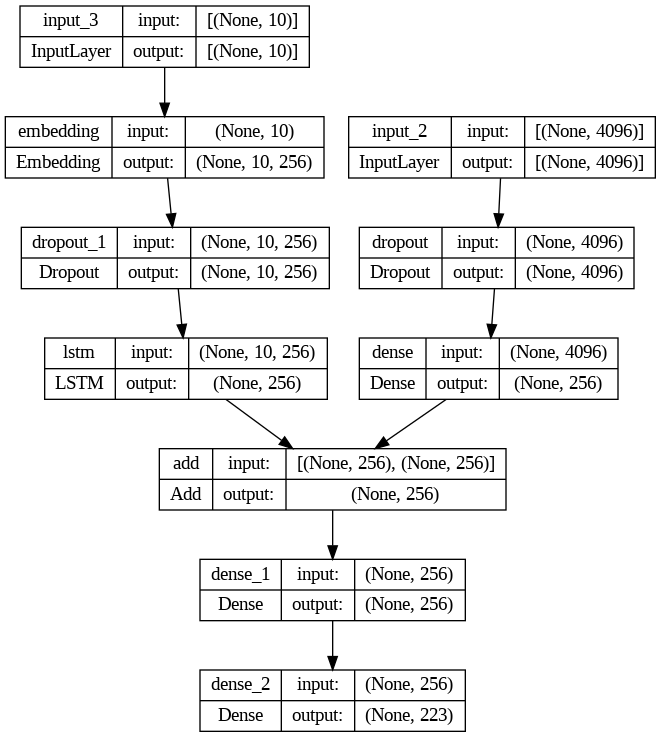

In [26]:
# encoder model
# image feature layers
inputs1 = Input(shape=(4096,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)
# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# plot the model
plot_model(model, show_shapes=True)

In [27]:
# train the model
epochs = 50
batch_size = 10
steps = len(train) // batch_size

for i in range(epochs):
    # create data generator
    generator = data_generator(train, mapping, features, tokenizer, max_length, vocab_size, batch_size)
    # fit for one epoch
    model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

9/9 [==============================] - 0s 54ms/step - loss: 0.0867


In [28]:
# save the model
model.save(WORKING_DIR+'/20240503_01.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [29]:
def idx_to_word(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

In [30]:
# generate caption for an image
def predict_caption(model, image, tokenizer, max_length):
    # add start tag for generation process
    in_text = 'startseq'
    # iterate over the max length of sequence
    for i in range(max_length):
        # encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        # pad the sequence
        sequence = pad_sequences([sequence], max_length)
        # predict next word
        yhat = model.predict([image, sequence], verbose=0)
        # get index with high probability
        yhat = np.argmax(yhat)
        # convert index to word
        word = idx_to_word(yhat, tokenizer)
        # stop if word not found
        if word is None:
            break
        # append word as input for generating next word
        in_text += " " + word
        # stop if we reach end tag
        if word == 'endseq':
            break
    return in_text

In [31]:
from nltk.translate.bleu_score import corpus_bleu
# validate with test data
actual, predicted = list(), list()

for key in tqdm(test):
    # get actual caption
    captions = mapping[key]
    # predict the caption for image
    y_pred = predict_caption(model, features[key], tokenizer, max_length)
    # split into words
    actual_captions = [caption.split() for caption in captions]
    y_pred = y_pred.split()
    # append to the list
    actual.append(actual_captions)
    predicted.append(y_pred)
# calcuate BLEU score
print("BLEU-1: %f" % corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
print("BLEU-2: %f" % corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))

  0%|          | 0/10 [00:00<?, ?it/s]

BLEU-1: 0.332601
BLEU-2: 0.000000


/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [32]:
from PIL import Image
import matplotlib.pyplot as plt
def generate_caption(image_name):
    # load the image
    # image_name = "1001773457_577c3a7d70.jpg"
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, image_name)
    image = Image.open(img_path)
    captions = mapping[image_id]
    print('---------------------Actual---------------------')
    for caption in captions:
        print(caption)
    # predict the caption
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)
    print('--------------------Predicted--------------------')
    print(y_pred)
    plt.imshow(image)

---------------------Actual---------------------
startseq 팽귄 사랑 endseq
--------------------Predicted--------------------
startseq 소년 고양이 고양이 endseq


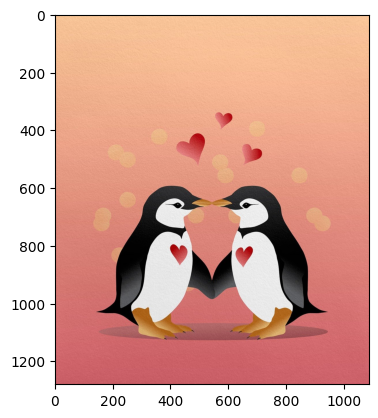

In [33]:
generate_caption("96.jpg")

---------------------Actual---------------------
startseq 가족 밥 식사 화목 endseq
--------------------Predicted--------------------
startseq 가족 밥 식사 화목 endseq

---------------------Actual---------------------
startseq 가족 배구공 화목함 나들이 endseq
--------------------Predicted--------------------
startseq 가족 배구공 화목함 나들이 endseq

---------------------Actual---------------------
startseq 강아지 멍멍이 개 서로 다른 색 endseq
--------------------Predicted--------------------
startseq 강아지 멍멍이 개 서로 다른 색 endseq

---------------------Actual---------------------
startseq 검정 고양이 책들 endseq
--------------------Predicted--------------------
startseq 검정 고양이 책들 endseq

---------------------Actual---------------------
startseq 계단 나무 빛나는 endseq
--------------------Predicted--------------------
startseq 계단 나무 빛나는 endseq

---------------------Actual---------------------
startseq 고슴도치 돌 endseq
--------------------Predicted--------------------
startseq 고슴도치 돌 endseq

---------------------Actual---------------------
startseq 고양이 돌 자연

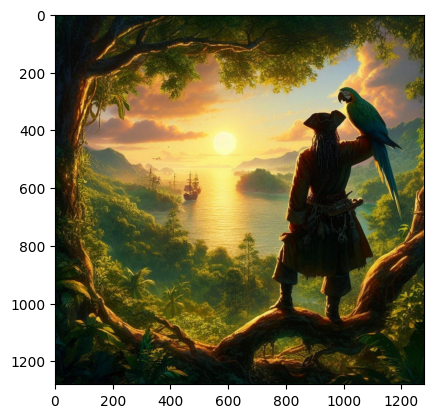

In [34]:
for i in range(1, 100):
    name = f"{i}.jpg"
    generate_caption(name)
    print()
    if i >= 90:
        print("NOT LEARNED")